<a href="https://colab.research.google.com/github/harshitharavi26/Sketch-Recognition/blob/main/Resnet_Sketch_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tqdm import tqdm
%matplotlib inline
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
dir = '/content/drive/My Drive/DATASET'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels

X,y,target_labels = load_dataset(dir)

['airplane' 'alarm clock' 'angel' 'ant' 'apple' 'arm' 'armchair' 'ashtray'
 'axe' 'backpack' 'banana' 'barn' 'baseball bat' 'basket' 'bathtub'
 'bear (animal)' 'bed' 'bee' 'beer-mug' 'bell' 'bench' 'bicycle'
 'binoculars' 'blimp' 'book' 'bookshelf' 'boomerang' 'bottle opener'
 'bowl' 'brain' 'bread' 'bridge' 'bulldozer' 'bus' 'bush' 'butterfly'
 'cabinet' 'cactus' 'cake' 'calculator' 'camel' 'camera' 'candle' 'cannon'
 'canoe' 'car (sedan)' 'carrot' 'castle' 'cat' 'cell phone' 'chair'
 'chandelier' 'church' 'cigarette' 'cloud' 'comb' 'computer monitor'
 'computer-mouse' 'couch' 'cow' 'crab' 'crane (machine)' 'crocodile'
 'crown' 'cup' 'diamond' 'dog' 'dolphin' 'donut' 'door' 'door handle'
 'dragon' 'duck' 'ear' 'elephant' 'envelope' 'eye' 'eyeglasses' 'face'
 'fan']


In [ ]:
classes = len(np.unique(y))
y= np_utils.to_categorical(y,classes)
y[0] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
X_train,x_val,Y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
print(len(X_train))
print(len(x_val))
print(len(x_test))

4096
1280
1024


In [ ]:
default_image_size=tuple((150,150))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Size of Training set: ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Size of Validation set: ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Size of Test set: ',x_test.shape)


Size of Training set:  (4096, 150, 150, 3)
Size of Validation set:  (1280, 150, 150, 3)
Size of Test set:  (1024, 150, 150, 3)


In [ ]:
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model, layers

resnet_model = ResNet50(input_shape = (150, 150, 3),include_top=False, weights='imagenet')
#for layer in pre_trained_model.layers:
 # layer.trainable = False
  
resnet_model.summary()

#last_layer = pre_trained_model.get_layer('conv5_block3_out')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output
from keras import Model
layer_name = 'conv5_block3_out'
my_model = Model(inputs=resnet_model.input,outputs=resnet_model.get_layer(layer_name).output)
my_model.summary()


94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
from keras import models         
model = models.Sequential()
model.add(my_model)
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(80,activation='softmax'))
model.layers[5].trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
print('Compilation done')

Compilation done


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=32),epochs=100,callbacks=[checkpoint,reduce_lr],verbose=2,
                          validation_data=imagegen.flow(x_val, y_val,batch_size=32),shuffle=True,steps_per_epoch=X_train.shape[0] //batch_size)

Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.70469, saving model to cnn3.hdf5
128/128 - 34s - loss: 0.0261 - accuracy: 0.9988 - val_loss: 1.3344 - val_accuracy: 0.7047
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.70469 to 0.71406, saving model to cnn3.hdf5
128/128 - 34s - loss: 0.0273 - accuracy: 0.9980 - val_loss: 1.2847 - val_accuracy: 0.7141
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.71406
128/128 - 33s - loss: 0.0252 - accuracy: 0.9990 - val_loss: 1.3810 - val_accuracy: 0.7016
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.71406
128/128 - 33s - loss: 0.0264 - accuracy: 0.9985 - val_loss: 1.3444 - val_accuracy: 0.7055
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.71406
128/128 - 33s - loss: 0.0262 - accuracy: 0.9980 - val_loss: 1.2946 - val_accuracy: 0.7086
Epoch 6/100

Epoch 00006: val_accuracy improved from 0.71406 to 0.71875, saving model to cnn3.hdf5
128/128 - 34s - loss: 0.0255 - accuracy: 0.9980 - va

In [ ]:
model.load_weights('cnn3.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=32,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!


 Test Loss Test accuracy: 1.2953765392303467 0.6708984375


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

687 Images are identified correctly
337 Images are identified incorrectly


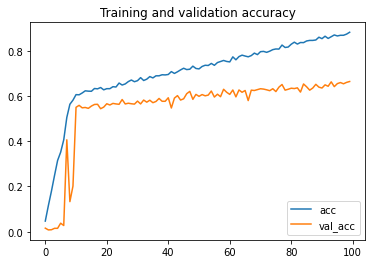

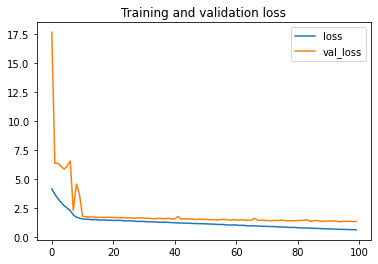

In [ ]:
import matplotlib.pyplot as plt
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

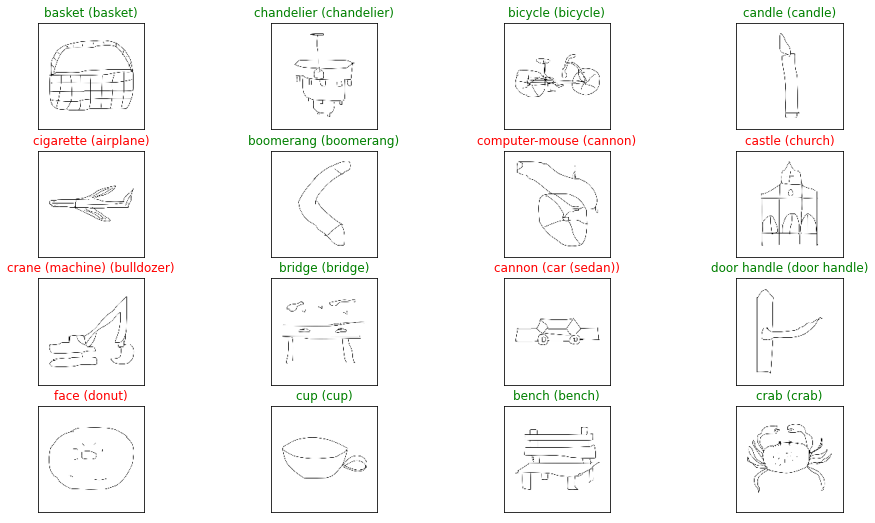

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))